In [16]:
from scipy.stats import bernoulli, uniform
from enum import Enum
from collections import Counter
import matplotlib.pyplot as plt

In [8]:
class BuiltOutcomes(Enum):
    BUILT = 1 # => land is built by 2019
    WILL = 2 # => land is built after 2019 but before 2023
    WONT = 3 # => land is not built during rhna cycle
    
    @classmethod
    def observed(cls, outcome):
        return outcome != BuiltOutcomes.WONT
    
    @classmethod
    def unobserved(cls, outcome):
        return outcome == BuiltOutcomes.WONT

In [9]:
def simulate_parcel(p):
    w = 5
    r = 8
    if bernoulli.rvs(p):
        if uniform.rvs(0, 8) < 5:
            return BuiltOutcomes.BUILT
        return BuiltOutcomes.WILL
    return BuiltOutcomes.WONT

In [10]:
def simulate_city(p, n):
    results = [simulate_parcel(p) for _ in range(n)]
    return Counter(results)

In [11]:
def evaluate_85_projection(true_p):
    M = 10**5
    r = 8
    w = 5
    results = simulate_city(true_p, M)
    n_built = results[BuiltOutcomes.BUILT] 
    p_hat = n_built / M * r / w
    return p_hat

In [14]:
true_ps = [0., 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
p_hats = [evaluate_85_projection(p) for p in true_ps]

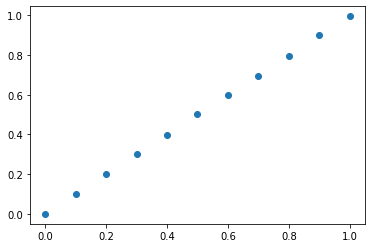

In [17]:
plt.scatter(true_ps, p_hats)

In [20]:
# What's the biggest residual?
max_resid = max([true_p - p_hat for true_p, p_hat in zip(true_ps,  p_hats)])
max_resid

0.0046880000000000255